# Series 03: SVM

In [23]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import joblib

In [2]:
tuning_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.93)),
    ('svm', SVC())
])

In [3]:
def prepare_data(data_path):
    df = pd.read_csv(data_path)
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    return X, y

In [5]:
X_train, y_train = prepare_data("/Users/nathanwegmann/Documents/UNIFR/MA/SP25/SP25_PR/group_project/FS-2025-Pattern-Recognition/data/train.csv")
X_test, y_test = prepare_data("/Users/nathanwegmann/Documents/UNIFR/MA/SP25/SP25_PR/group_project/FS-2025-Pattern-Recognition/data/test.csv")
X_smaller, _, y_smaller, _ = train_test_split(X_train, y_train, train_size = 0.4, stratify=y_train, random_state=42)

In [ ]:
def find_best_params(X_train, y_train, param_grid = None, train_size = 0.2):
    X_tune, _, y_tune, _ = train_test_split(X_train, y_train, train_size = train_size, stratify=y_train, random_state=42)
    grid = GridSearchCV(tuning_pipeline, param_grid, cv=3, verbose=2)
    grid.fit(X_tune, y_tune)
    print("Best parameters:", grid.best_params_)

In [7]:
param1={
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.01, 0.001]
}

In [8]:
find_best_params(X_train=X_train, y_train=y_train, param_grid=param1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   3.3s
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   3.3s
[CV] END ....svm__C=0.1, svm__gamma=0.01, svm__kernel=linear; total time=   3.1s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=  14.6s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=  15.1s
[CV] END .......svm__C=0.1, svm__gamma=0.01, svm__kernel=rbf; total time=  14.7s
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time=   3.1s
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time=   3.2s
[CV] END ...svm__C=0.1, svm__gamma=0.001, svm__kernel=linear; total time=   3.5s
[CV] END ......svm__C=0.1, svm__gamma=0.001, svm__kernel=rbf; total time=   9.6s
[CV] END ......svm__C=0.1, svm__gamma=0.001, svm__kernel=rbf; total time=  10.0s
[CV] END ......svm__C=0.1, svm__gamma=0.001, svm

In [12]:
param2={
      'svm__kernel': ['rbf'],
      'svm__C': [5,  10, 20],
      'svm__gamma': [5e-4, 0.001, 0.002],
}

In [13]:
find_best_params(X_train=X_train, y_train=y_train, param_grid=param2)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .......svm__C=5, svm__gamma=0.0005, svm__kernel=rbf; total time=   5.0s
[CV] END .......svm__C=5, svm__gamma=0.0005, svm__kernel=rbf; total time=   5.1s
[CV] END .......svm__C=5, svm__gamma=0.0005, svm__kernel=rbf; total time=   5.2s
[CV] END ........svm__C=5, svm__gamma=0.001, svm__kernel=rbf; total time=   5.1s
[CV] END ........svm__C=5, svm__gamma=0.001, svm__kernel=rbf; total time=   5.3s
[CV] END ........svm__C=5, svm__gamma=0.001, svm__kernel=rbf; total time=   5.2s
[CV] END ........svm__C=5, svm__gamma=0.002, svm__kernel=rbf; total time=   6.2s
[CV] END ........svm__C=5, svm__gamma=0.002, svm__kernel=rbf; total time=   6.9s
[CV] END ........svm__C=5, svm__gamma=0.002, svm__kernel=rbf; total time=   6.3s
[CV] END ......svm__C=10, svm__gamma=0.0005, svm__kernel=rbf; total time=   4.6s
[CV] END ......svm__C=10, svm__gamma=0.0005, svm__kernel=rbf; total time=   4.8s
[CV] END ......svm__C=10, svm__gamma=0.0005, svm_

In [14]:
param3 = {
    'svm__kernel': ['rbf'],
    'svm__C': [9, 10, 11],
    'svm__gamma': [0.0009, 0.001, 0.0011]
}

In [15]:
find_best_params(X_train, y_train, param_grid=param3)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .......svm__C=9, svm__gamma=0.0009, svm__kernel=rbf; total time=   5.1s
[CV] END .......svm__C=9, svm__gamma=0.0009, svm__kernel=rbf; total time=   5.3s
[CV] END .......svm__C=9, svm__gamma=0.0009, svm__kernel=rbf; total time=   5.2s
[CV] END ........svm__C=9, svm__gamma=0.001, svm__kernel=rbf; total time=   5.4s
[CV] END ........svm__C=9, svm__gamma=0.001, svm__kernel=rbf; total time=   5.2s
[CV] END ........svm__C=9, svm__gamma=0.001, svm__kernel=rbf; total time=   5.3s
[CV] END .......svm__C=9, svm__gamma=0.0011, svm__kernel=rbf; total time=   5.2s
[CV] END .......svm__C=9, svm__gamma=0.0011, svm__kernel=rbf; total time=   5.3s
[CV] END .......svm__C=9, svm__gamma=0.0011, svm__kernel=rbf; total time=   5.2s
[CV] END ......svm__C=10, svm__gamma=0.0009, svm__kernel=rbf; total time=   5.1s
[CV] END ......svm__C=10, svm__gamma=0.0009, svm__kernel=rbf; total time=   5.2s
[CV] END ......svm__C=10, svm__gamma=0.0009, svm_

## Testing best hyperparameters:

In [16]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.93)),
    ('svm', SVC(C=9, gamma=0.0011, kernel='rbf', class_weight='balanced'))
])

In [24]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.show()

Training
Accuracy: 0.9752


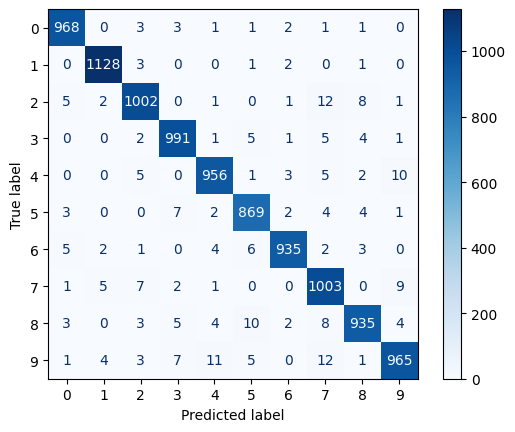

In [25]:
print("Training")
model.fit(X_train, y_train)
test_model(model, X_test=X_test, y_test=y_test)

In [26]:
#TRAIN FINAL MODEL:
X_final = pd.concat([X_train, X_test], axis=0)
y_final = pd.concat([y_train, y_test], axis=0)
print("Training on combined dataset")
model.fit(X_final, y_final)

Training on combined dataset


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.93)),
                ('svm', SVC(C=9, class_weight='balanced', gamma=0.0011))])

In [27]:
# Save the final model
joblib.dump(model, "svm_model_final.joblib")
print("Final model saved as 'svm_model_final.joblib'")

Final model saved as 'svm_model_final.joblib'


Sanity check on final model
Accuracy: 0.9979


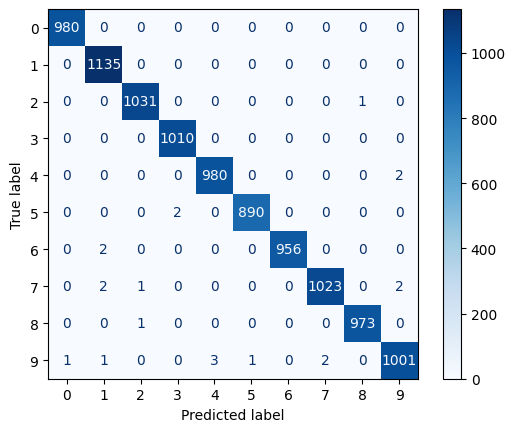

In [29]:
print("Sanity check on final model")
test_model(joblib.load("svm_model_final.joblib"), X_test=X_test, y_test=y_test)